## EXERCISE 7
Train and fine-tune a decision tree for the moons dataset by following these
 steps:

 a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.
 
 b. Use train_test_split() to split the dataset into a training set and a test set.
 
 c. Use grid search with cross-validation (with the help of the GridSearchCV
 class) to find good hyperparameter values for a DecisionTreeClassifier.
 Hint: try various values for max_leaf_nodes.
 
 d. Train it on the full training set using these hyperparameters, and measure
 your model’s performance on the test set. You should get roughly 85% to 87%
 accuracy

In [13]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [15]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

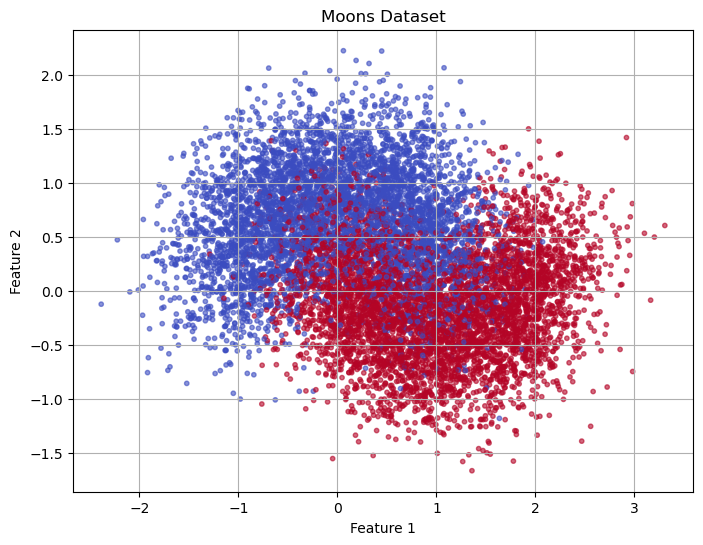

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=10, alpha=0.6)
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
dt_clf =DecisionTreeClassifier(random_state=42)

#To try different values for max_leaf_nodes
param_grid = {
    'max_leaf_nodes': list(range(2, 100))
}

# Perfom Grid Search with Cross Validation

grid_search = GridSearchCV(dt_clf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

#Get best estimator
best_tree_clf = grid_search.best_estimator_
print("Best max_leaf_nodes: ", grid_search.best_params_)

Best max_leaf_nodes:  {'max_leaf_nodes': 10}


In [21]:
# Predict on the test set
y_pred = best_tree_clf.predict(X_test)

# Evaluate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.2%}")


Test accuracy: 84.69%


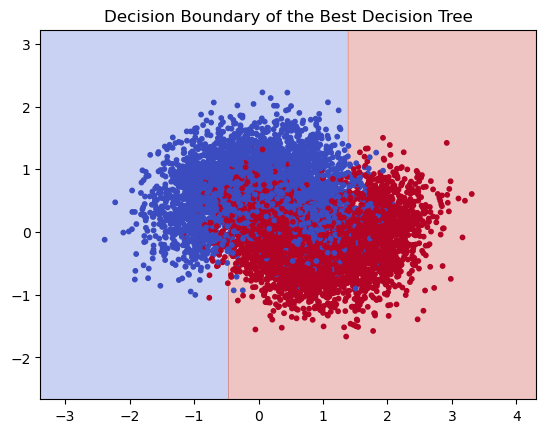

In [37]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=10)
    plt.title("Decision Boundary of the Best Decision Tree")
    plt.show()

plot_decision_boundary(best_tree_clf, X_test, y_test)


## EXERCISE 8

Grow a forest by following these steps:


 a. Continuing the previous exercise, generate 1,000 subsets of the training set,
 each containing 100 instances selected randomly. Hint: you can use Scikit
Learn’s ShuffleSplit class for this.

 b. Train one decision tree on each subset, using the best hyperparameter values
 found in the previous exercise. Evaluate these 1,000 decision trees on the test
 set. Since they were trained on smaller sets, these decision trees will likely
 perform worse than the first decision tree, achieving only about 80% accuracy.

 
 c. Now comes the magic. For each test set instance, generate the predictions of
 the 1,000 decision trees, and keep only the most frequent prediction (you can
 use SciPy’s mode() function for this). This approach gives you majority-vote
 predictions over the test set.

 
 d. Evaluate these predictions on the test set: you should obtain a slightly higher
 accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
 you have trained a random forest classifier!

In [55]:
from sklearn.model_selection import ShuffleSplit

splitter = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)
subsets = [train_idx for train_idx, _ in splitter.split(X_train)]


In [59]:
from sklearn.tree import DecisionTreeClassifier
all_preds = []
best_node = 36  
for idx in subsets:
    X_small = X_train[idx]
    y_small = y_train[idx]
    
    tree = DecisionTreeClassifier(max_leaf_nodes=best_node, random_state=42)
    tree.fit(X_small, y_small)
    
    preds = tree.predict(X_test)
    all_preds.append(preds)


In [61]:
import numpy as np
from scipy.stats import mode

# Convert to NumPy array
all_preds = np.array(all_preds)

# Majority vote across rows (axis=0)
final_preds, _ = mode(all_preds, axis=0, keepdims=False)


In [63]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, final_preds)
print(f"Manual Random Forest accuracy: {acc:.2%}")


Manual Random Forest accuracy: 86.14%
